In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import matplotlib
import seaborn as sns

%matplotlib inline

In [54]:
matplotlib.style.use("seaborn")

/tmp/ipykernel_79195/3955487931.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  matplotlib.style.use("seaborn")


In [55]:
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["font.size"] = "14"

In [56]:
df = pd.read_json(open("data/nobel_winners_cleaned.json"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   link            971 non-null    object
 1   name            971 non-null    object
 2   year            971 non-null    int64 
 3   category        970 non-null    object
 4   country         971 non-null    object
 5   text            971 non-null    object
 6   date_of_birth   971 non-null    object
 7   date_of_death   673 non-null    object
 8   place_of_birth  971 non-null    object
 9   place_of_death  670 non-null    object
 10  gender          971 non-null    object
 11  award_age       971 non-null    int64 
 12  born_in         127 non-null    object
 13  mini_bio        451 non-null    object
 14  bio_image       451 non-null    object
dtypes: int64(2), object(13)
memory usage: 113.9+ KB


In [57]:
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   link            971 non-null    object        
 1   name            971 non-null    object        
 2   year            971 non-null    int64         
 3   category        970 non-null    object        
 4   country         971 non-null    object        
 5   text            971 non-null    object        
 6   date_of_birth   971 non-null    datetime64[ns]
 7   date_of_death   673 non-null    datetime64[ns]
 8   place_of_birth  971 non-null    object        
 9   place_of_death  670 non-null    object        
 10  gender          971 non-null    object        
 11  award_age       971 non-null    int64         
 12  born_in         127 non-null    object        
 13  mini_bio        451 non-null    object        
 14  bio_image       451 non-null    object        
dtypes: dat

<Axes: xlabel='gender'>

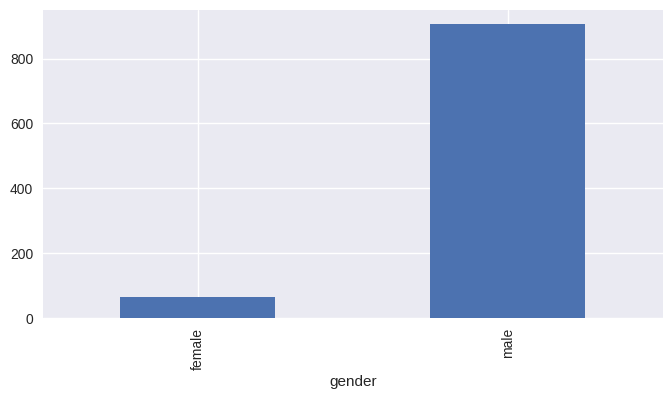

In [58]:
by_gender = df.groupby("gender")
by_gender.size().plot(kind="bar")

<Axes: xlabel='country'>

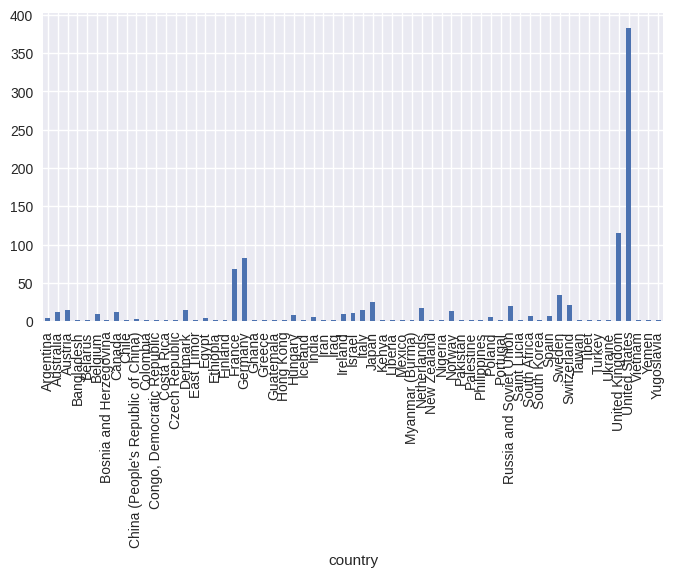

In [59]:
by_country = df.groupby("country")
by_country.size().plot(kind="bar")

<Axes: xlabel='category'>

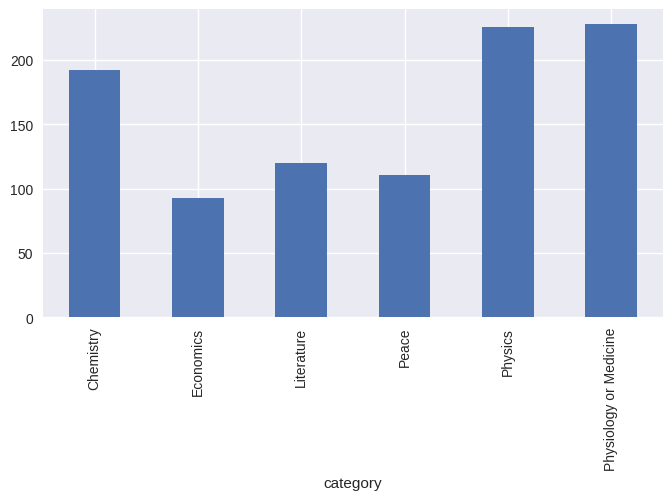

In [60]:
by_category = df.groupby("category")
by_category.size().plot(kind="bar")

In [61]:
by_gender.size()

gender
female     65
male      906
dtype: int64

In [62]:
by_cat_gen = df.groupby(["category", "gender"])
by_cat_gen.get_group(("Physics", "female"))[["name", "year"]]

,name,year
100,Maria Goeppert-Mayer,1963
391,Andrea Ghez,2020
578,Anne L'Huillier,2023
618,Marie Skłodowska-Curie,1903
946,Donna Strickland,2018


In [63]:
by_cat_gen.size()

category                gender
Chemistry               female      8
                        male      184
Economics               female      3
                        male       90
Literature              female     17
                        male      103
Peace                   female     19
                        male       92
Physics                 female      5
                        male      221
Physiology or Medicine  female     13
                        male      215
dtype: int64

<Axes: ylabel='category,gender'>

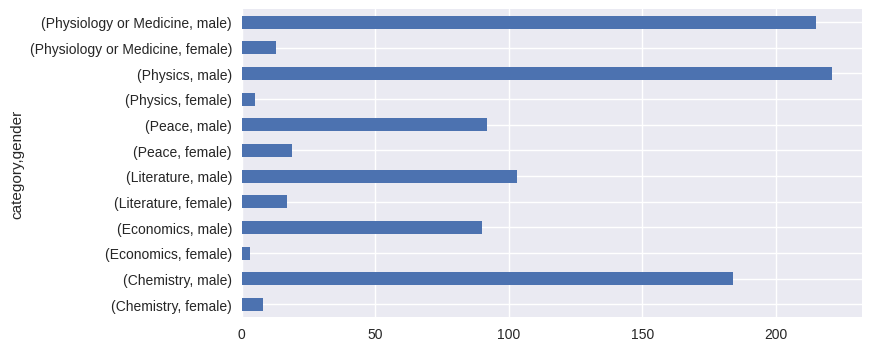

In [64]:
by_cat_gen.size().plot(kind="barh")

<Axes: ylabel='category'>

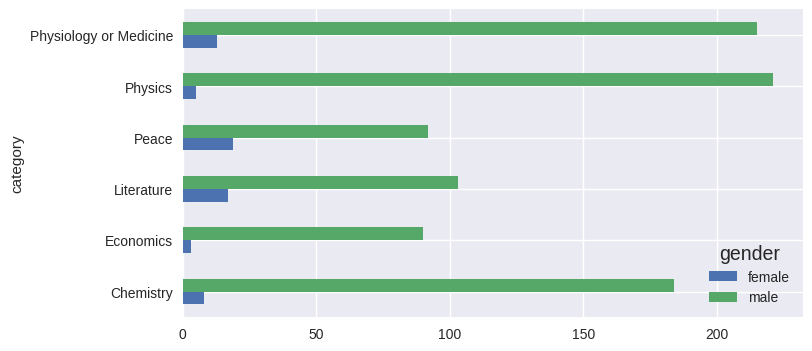

In [65]:
by_cat_gen.size().unstack().plot(kind="barh")

In [66]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz.head()

gender,female,male
category,,
Chemistry,8,184
Economics,3,90
Literature,17,103
Peace,19,92
Physics,5,221


In [67]:
cat_gen_sz["ratio"] = cat_gen_sz.female / (cat_gen_sz.female + cat_gen_sz.male)
cat_gen_sz.head()

gender,female,male,ratio
category,,,
Chemistry,8,184,0.041667
Economics,3,90,0.032258
Literature,17,103,0.141667
Peace,19,92,0.171171
Physics,5,221,0.022124


Text(0.5, 0, '% of feamle winners')

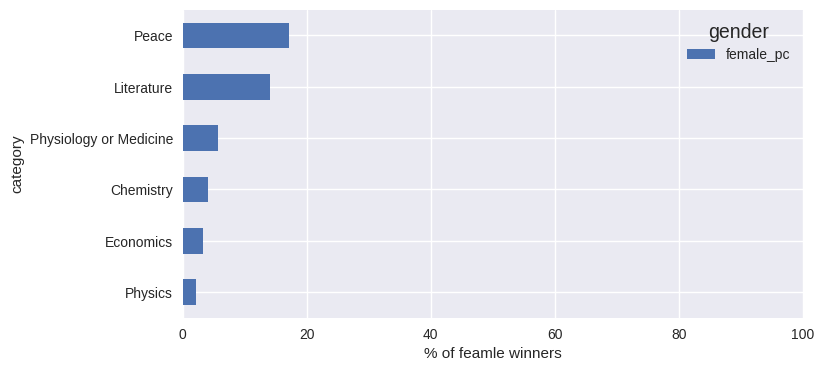

In [68]:
cat_gen_sz["female_pc"] = cat_gen_sz["ratio"] * 100
cat_gen_sz = cat_gen_sz.sort_values(by="female_pc", ascending=True)
ax = cat_gen_sz[["female_pc"]].plot(kind="barh")
ax.set_xlim([0, 100])
ax.set_xlabel("% of feamle winners")

Text(0.5, 0, '% of feamle winners')

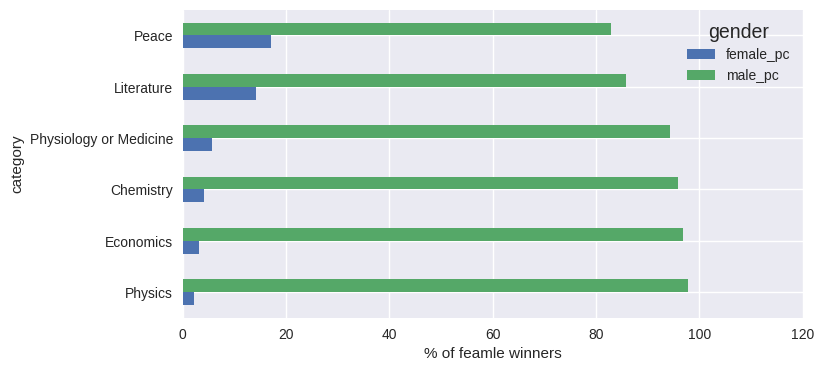

In [69]:
cat_gen_sz["female_pc"] = cat_gen_sz["ratio"] * 100
cat_gen_sz["male_pc"] = 100 - (cat_gen_sz["ratio"] * 100)
cat_gen_sz = cat_gen_sz.sort_values(by="female_pc", ascending=True)
ax = cat_gen_sz[["female_pc", "male_pc"]].plot(kind="barh")
ax.set_xlim([0, 120])
ax.set_xlabel("% of feamle winners")

Text(0.5, 0, '% of feamle winners')

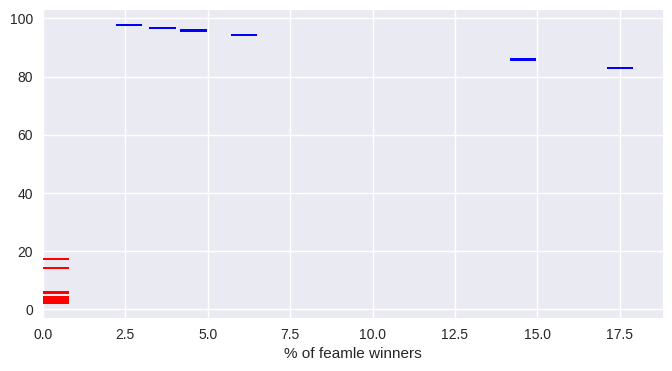

In [70]:
cat_gen_sz["female_pc"] = cat_gen_sz["ratio"] * 100
cat_gen_sz["male_pc"] = 100 - (cat_gen_sz["ratio"] * 100)
cat_gen_sz = cat_gen_sz.sort_values(by="female_pc", ascending=True)
# ax = cat_gen_sz[["female_pc",'male_pc']].plot(kind="barh")
# ax = cat_gen_sz[["female_pc",'male_pc']].plot(kind="barh")
fig, ax = plt.subplots(figsize=(8, 4))
xlocs = np.arange(0, 100)
ax.barh(cat_gen_sz["female_pc"], width=0.8, color="r")
ax.barh(cat_gen_sz["male_pc"], width=0.8, color="b", left=cat_gen_sz["female_pc"])
# ax.set_xlim([0, 120])
ax.set_xlabel("% of feamle winners")

In [71]:
df[(df.category == "Physics") & (df.gender == "female")][["name", "country", "year"]]

,name,country,year
100,Maria Goeppert-Mayer,United States,1963
391,Andrea Ghez,United States,2020
578,Anne L'Huillier,Sweden,2023
618,Marie Skłodowska-Curie,Poland,1903
946,Donna Strickland,Canada,2018


<Axes: xlabel='year'>

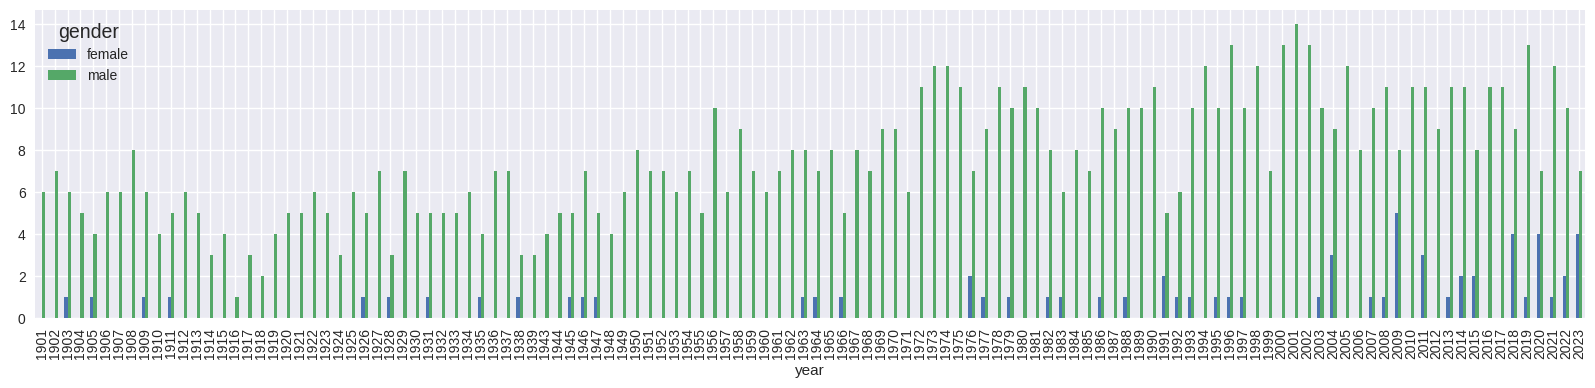

In [72]:
by_year_gender = df.groupby(["year", "gender"])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind="bar", figsize=(20, 4))

In [73]:
def thin_xtrics(ax, tick_gap=10, rotation=45):
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]

    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()

In [74]:
by_year_gender = df.groupby(["year", "gender"])
by_year_gender.size().unstack()

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,7.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
...,...,...
2019,1.0,13.0
2020,4.0,7.0
2021,1.0,12.0


Text(0.5, 0, 'Year')

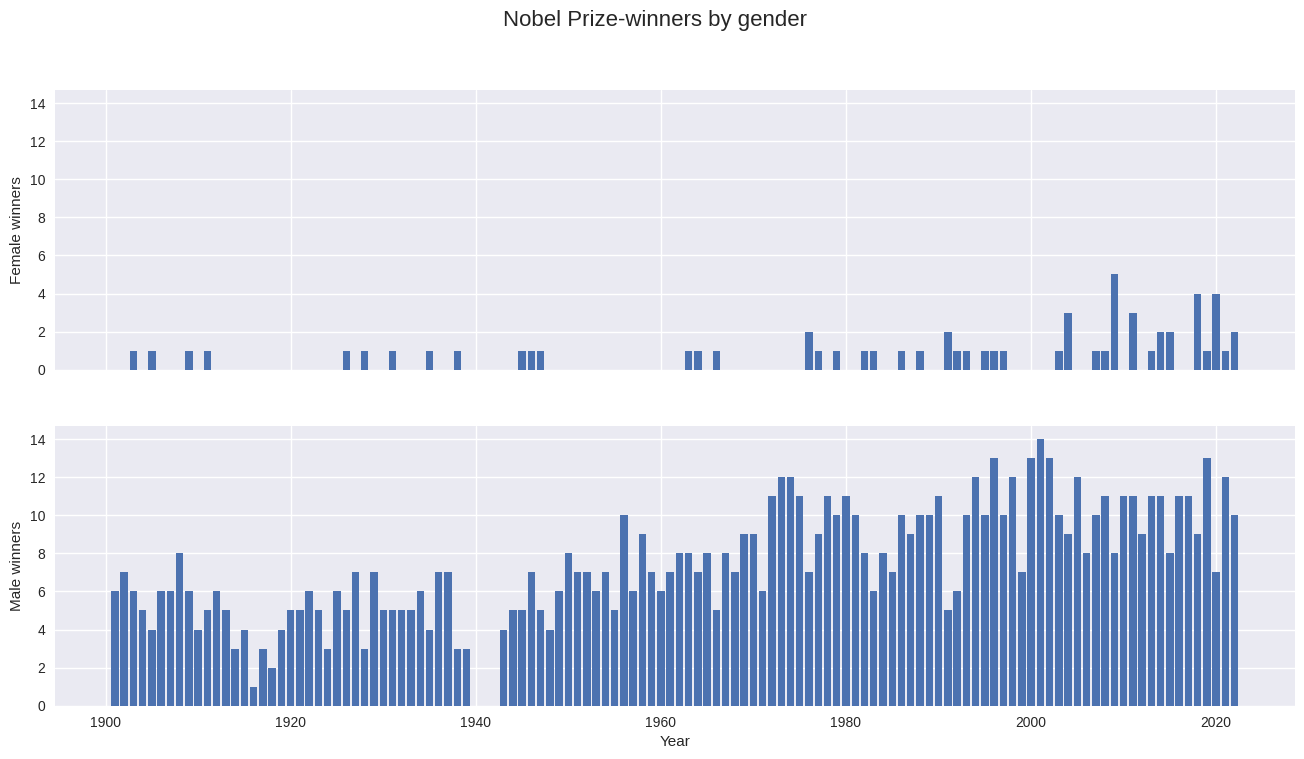

In [75]:
new_index = pd.Index(np.arange(1901, 2023), name="year")
by_year_gender = df.groupby(["year", "gender"])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(16, 8))
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle("Nobel Prize-winners by gender", fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel("Female winners")
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel("Male winners")
ax_m.set_xlabel("Year")

<Axes: xlabel='country'>

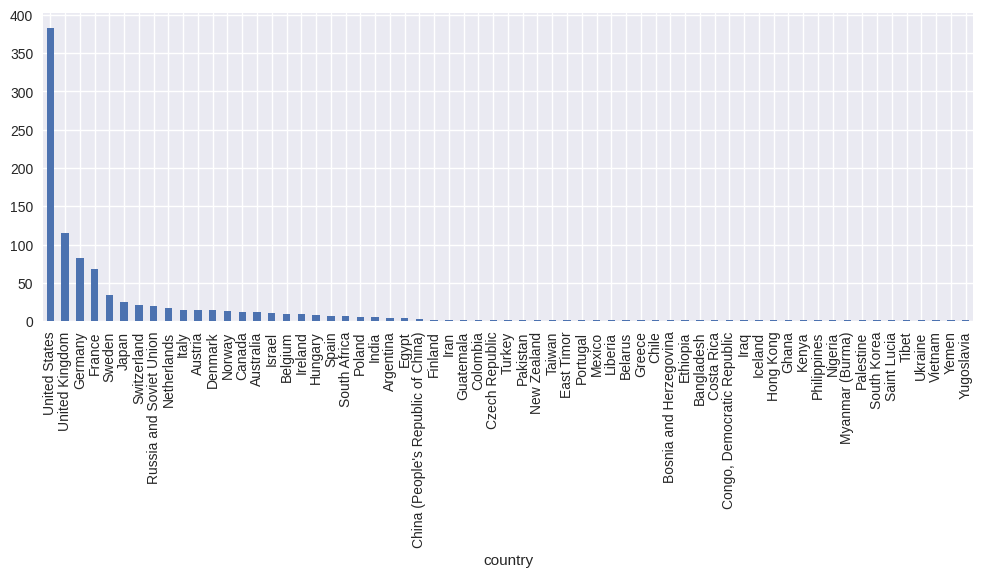

In [76]:
# national trends

df.groupby("country").size().sort_values(ascending=False).plot(
    kind="bar", figsize=[12, 4]
)

<Axes: xlabel='country'>

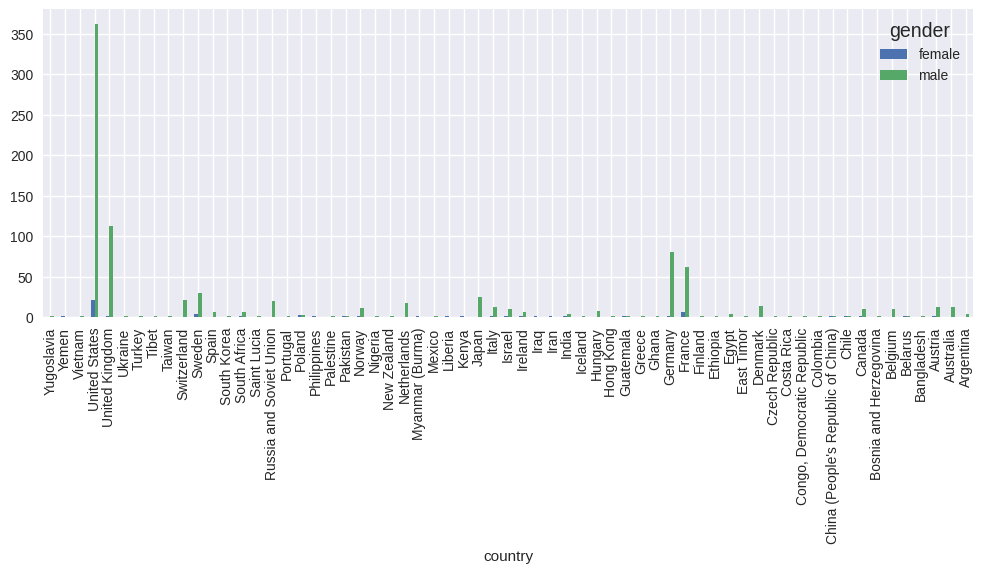

In [77]:
df.groupby(["country", "gender"]).size().unstack().sort_values(
    by="country", ascending=False
).plot(kind="bar", figsize=[12, 4])

<Axes: xlabel='country'>

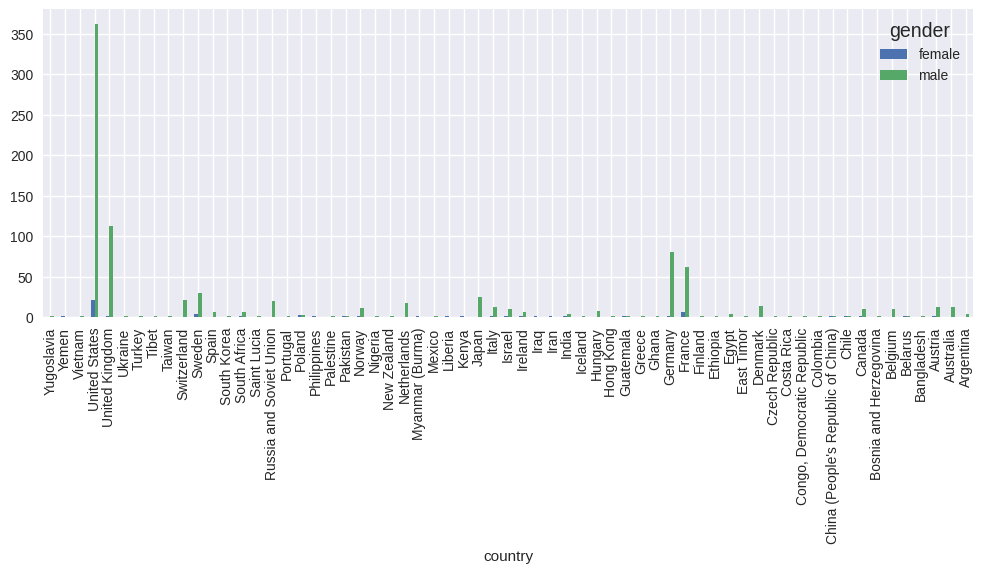

In [78]:
# make it sorted by number of prizes
df.groupby(["country", "gender"]).size().unstack().sort_values(
    by="country", ascending=False
).plot(kind="bar", figsize=[12, 4])

In [79]:
# prize winners per capita
nat_group = df.groupby("country")
ngsz = nat_group.size()
ngsz.index

Index(['Argentina', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium',
       'Bosnia and Herzegovina', 'Canada', 'Chile',
       'China (People's Republic of China)', 'Colombia',
       'Congo, Democratic Republic', 'Costa Rica', 'Czech Republic', 'Denmark',
       'East Timor', 'Egypt', 'Ethiopia', 'Finland', 'France', 'Germany',
       'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland',
       'India', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kenya',
       'Liberia', 'Mexico', 'Myanmar (Burma)', 'Netherlands', 'New Zealand',
       'Nigeria', 'Norway', 'Pakistan', 'Palestine', 'Philippines', 'Poland',
       'Portugal', 'Russia and Soviet Union', 'Saint Lucia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Tibet',
       'Turkey', 'Ukraine', 'United Kingdom', 'United States', 'Vietnam',
       'Yemen', 'Yugoslavia'],
      dtype='object', name='country')

In [80]:
df_countries = pd.read_json("data/winning_country_data.json", orient="index")
df_countries.loc["Japan"]

gini                   38.1
name                  Japan
alpha3Code              JPN
area               377930.0
latlng        [36.0, 138.0]
capital               Tokyo
population        127080000
Name: Japan, dtype: object

In [81]:
df_countries

,gini,name,alpha3Code,area,latlng,capital,population
Turkey,39.0,Turkey,TUR,783562.0,"[39.0, 35.0]",Ankara,76667864
East Timor,31.9,East Timor,TLS,14874.0,"[-8.83333333, 125.91666666]",Dili,1172390
Italy,36.0,Italy,ITA,301336.0,"[42.83333333, 12.83333333]",Rome,60769102
Czech Republic,26.0,Czech Republic,CZE,78865.0,"[49.75, 15.5]",Prague,10521600
Canada,32.6,Canada,CAN,9984670.0,"[60.0, -95.0]",Ottawa,35540419
Kenya,47.7,Kenya,KEN,580367.0,"[1.0, 38.0]",Nairobi,41800000
Saint Lucia,42.6,Saint Lucia,LCA,616.0,"[13.88333333, -60.96666666]",Castries,184000
Costa Rica,50.7,Costa Rica,CRI,51100.0,"[10.0, -84.0]",San José,4713168
France,32.7,France,FRA,640679.0,"[46.0, 2.0]",Paris,66078000
Ireland,34.3,Ireland,IRL,70273.0,"[53.0, -8.0]",Dublin,6378000


In [82]:
df_countries = df_countries.set_index("name")
df_countries["nobel_wins"] = ngsz
df_countries["nobel_wins_per_capita"] = (
    df_countries.nobel_wins / df_countries.population
)
df_countries

,gini,alpha3Code,area,latlng,capital,population,nobel_wins,nobel_wins_per_capita
name,,,,,,,,
Turkey,39.0,TUR,783562.0,"[39.0, 35.0]",Ankara,76667864,2.0,2.608655e-08
East Timor,31.9,TLS,14874.0,"[-8.83333333, 125.91666666]",Dili,1172390,2.0,1.705917e-06
Italy,36.0,ITA,301336.0,"[42.83333333, 12.83333333]",Rome,60769102,14.0,2.303802e-07
Czech Republic,26.0,CZE,78865.0,"[49.75, 15.5]",Prague,10521600,2.0,1.900852e-07
Canada,32.6,CAN,9984670.0,"[60.0, -95.0]",Ottawa,35540419,12.0,3.376437e-07
Kenya,47.7,KEN,580367.0,"[1.0, 38.0]",Nairobi,41800000,1.0,2.392344e-08
Saint Lucia,42.6,LCA,616.0,"[13.88333333, -60.96666666]",Castries,184000,1.0,5.434783e-06
Costa Rica,50.7,CRI,51100.0,"[10.0, -84.0]",San José,4713168,1.0,2.121715e-07
France,32.7,FRA,640679.0,"[46.0, 2.0]",Paris,66078000,68.0,1.029087e-06


<Axes: xlabel='name'>

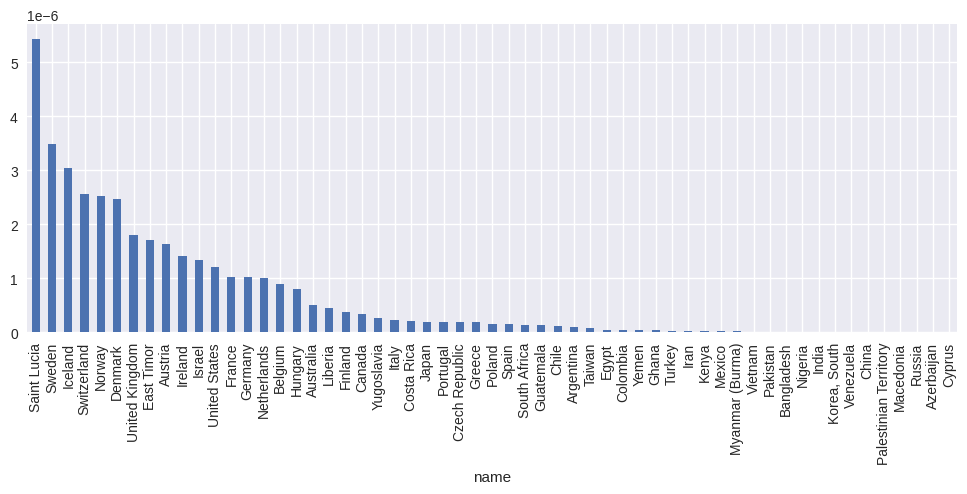

In [83]:
df_countries.sort_values(
    by="nobel_wins_per_capita", ascending=False
).nobel_wins_per_capita.plot(kind="bar", figsize=[12, 4])

<Axes: ylabel='name'>

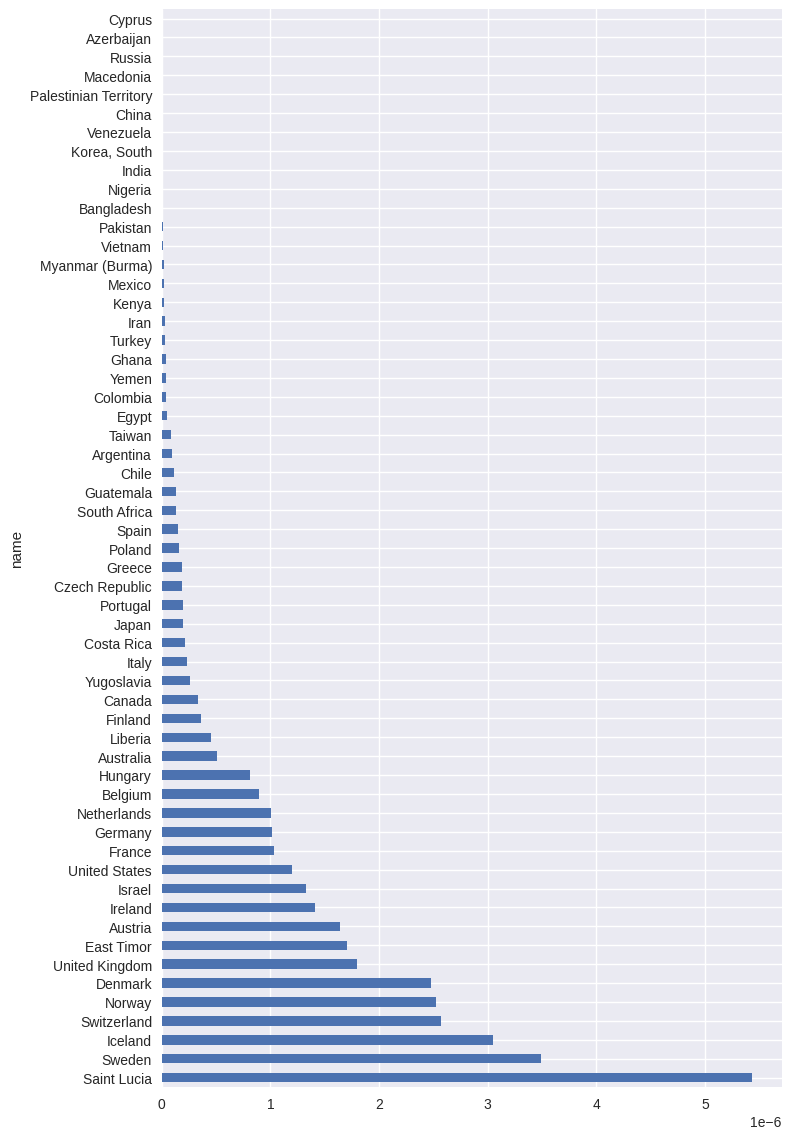

In [84]:
df_countries.sort_values(
    by="nobel_wins_per_capita", ascending=False
).nobel_wins_per_capita.plot(kind="barh", figsize=[8, 14])

<Axes: xlabel='name'>

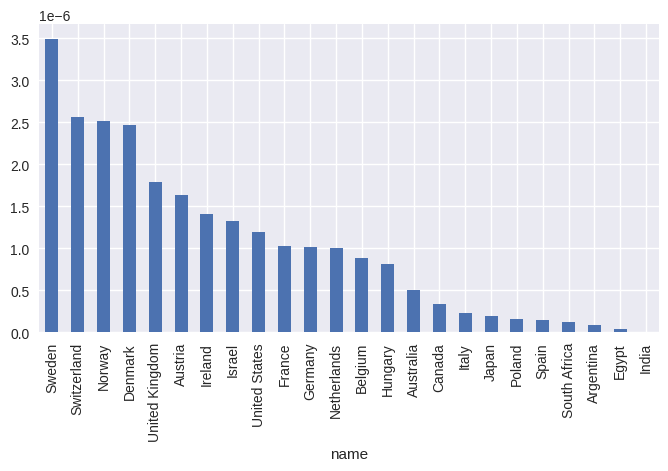

In [85]:
df_countries[df_countries.nobel_wins > 2].sort_values(
    by="nobel_wins_per_capita", ascending=False
).nobel_wins_per_capita.plot(kind="bar")

In [86]:
# prizes by category
nat_cat_sz = df.groupby(["country", "category"]).size().unstack()
nat_cat_sz

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,1.0
Australia,NaN,NaN,1.0,NaN,4.0,7.0
Austria,1.0,1.0,2.0,2.0,4.0,4.0
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN
Belarus,NaN,NaN,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...
United Kingdom,29.0,9.0,13.0,9.0,23.0,32.0
United States,77.0,65.0,12.0,21.0,99.0,109.0
Vietnam,NaN,NaN,NaN,1.0,NaN,NaN


In [87]:
df.groupby(["country", "category"]).size()

country        category              
Argentina      Chemistry                   1
               Peace                       2
               Physiology or Medicine      1
Australia      Literature                  1
               Physics                     4
                                        ... 
United States  Physics                    99
               Physiology or Medicine    109
Vietnam        Peace                       1
Yemen          Peace                       1
Yugoslavia     Literature                  1
Length: 168, dtype: int64

In [88]:
for label, col in list(nat_cat_sz.items()):
    print(label, col)

Chemistry country
Argentina          1.0
Australia          NaN
Austria            1.0
Bangladesh         NaN
Belarus            NaN
                  ... 
United Kingdom    29.0
United States     77.0
Vietnam            NaN
Yemen              NaN
Yugoslavia         NaN
Name: Chemistry, Length: 63, dtype: float64
Economics country
Argentina          NaN
Australia          NaN
Austria            1.0
Bangladesh         NaN
Belarus            NaN
                  ... 
United Kingdom     9.0
United States     65.0
Vietnam            NaN
Yemen              NaN
Yugoslavia         NaN
Name: Economics, Length: 63, dtype: float64
Literature country
Argentina          NaN
Australia          1.0
Austria            2.0
Bangladesh         NaN
Belarus            1.0
                  ... 
United Kingdom    13.0
United States     12.0
Vietnam            NaN
Yemen              NaN
Yugoslavia         1.0
Name: Literature, Length: 63, dtype: float64
Peace country
Argentina          2.0
Australia       

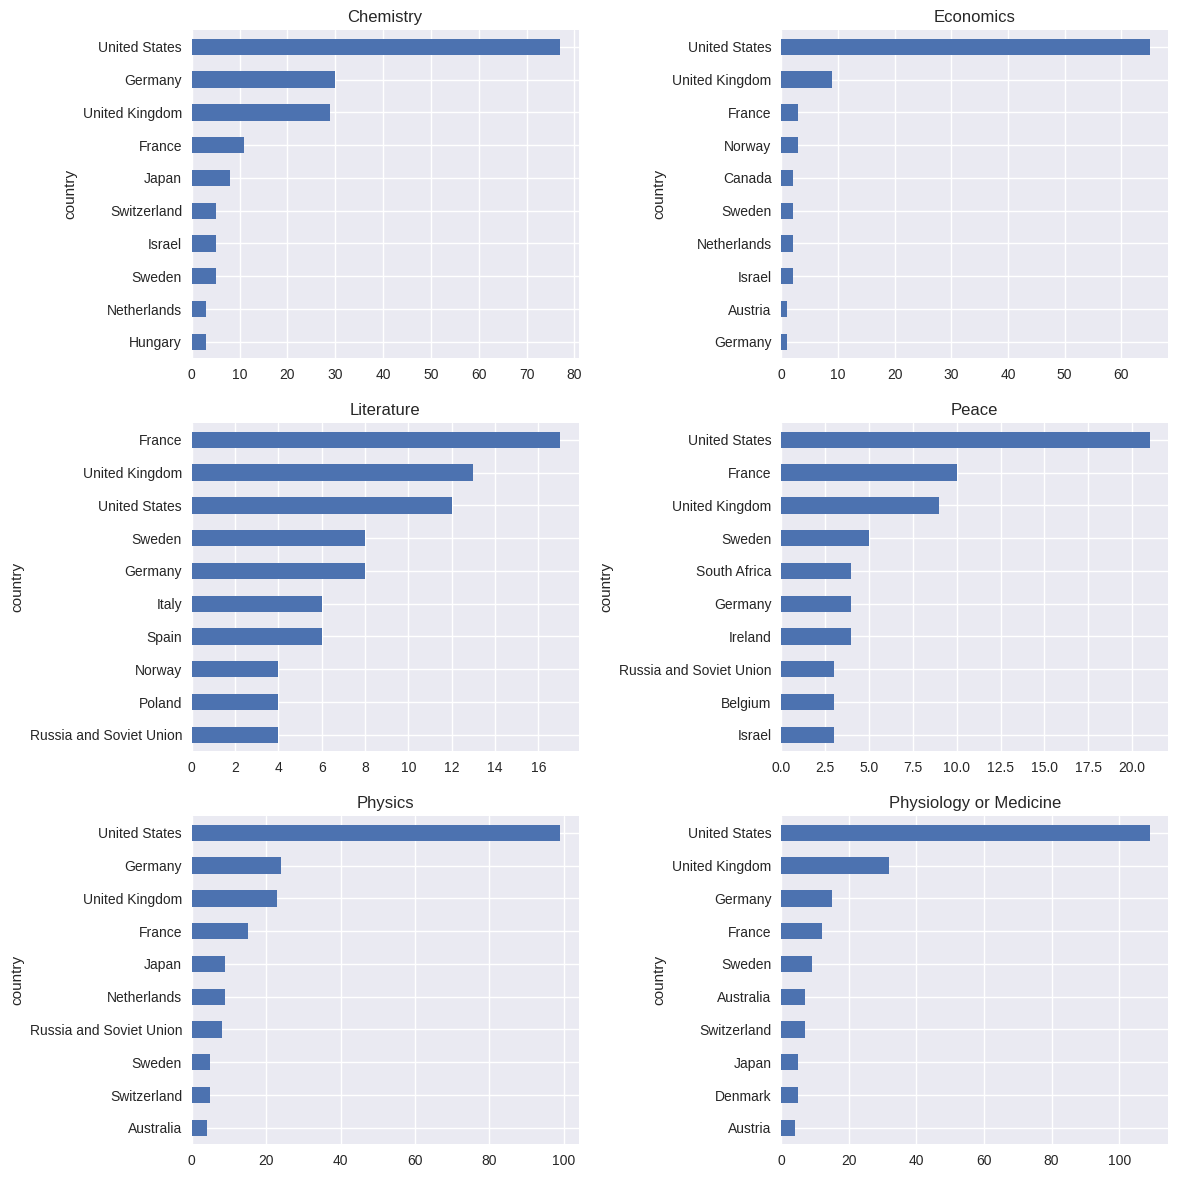

In [89]:
COL_NUM = 2
ROW_NUM = 3

fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12, 12))

for i, (label, col) in enumerate(nat_cat_sz.items()):
    ax = axes[i // COL_NUM, i % COL_NUM]
    col = col.sort_values(ascending=False)[:10]
    col = col.sort_values(ascending=True)
    col.plot(kind="barh", ax=ax)
    ax.set_title(label)

plt.tight_layout()

<Axes: xlabel='year'>

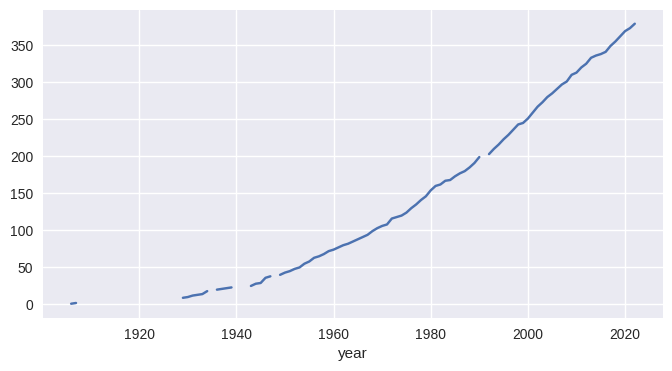

In [90]:
# historical trends in prize distribution

plt.rcParams["font.size"] = 20

new_index = pd.Index(np.arange(1901, 2023), name="year")
by_year_nat_sz = df.groupby(["year", "country"]).size().unstack().reindex(new_index)
by_year_nat_sz["United States"].cumsum().plot()

<Axes: xlabel='year'>

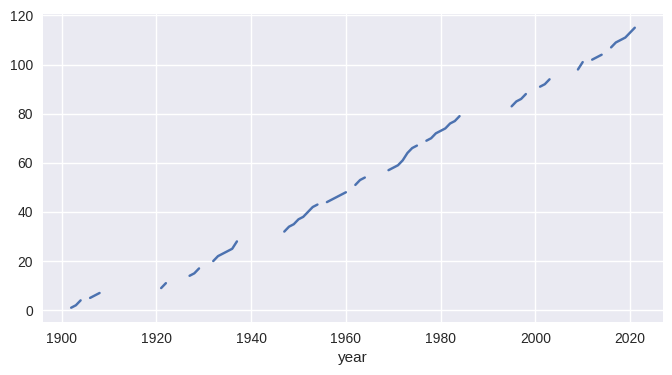

In [91]:
by_year_nat_sz["United Kingdom"].cumsum().plot()

<Axes: xlabel='year'>

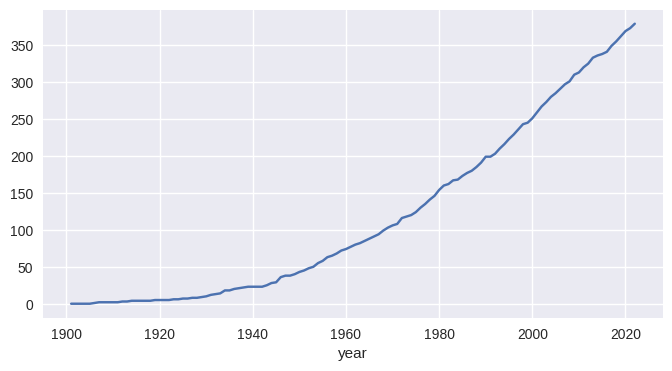

In [92]:
by_year_nat_sz["United States"].fillna(0).cumsum().plot()

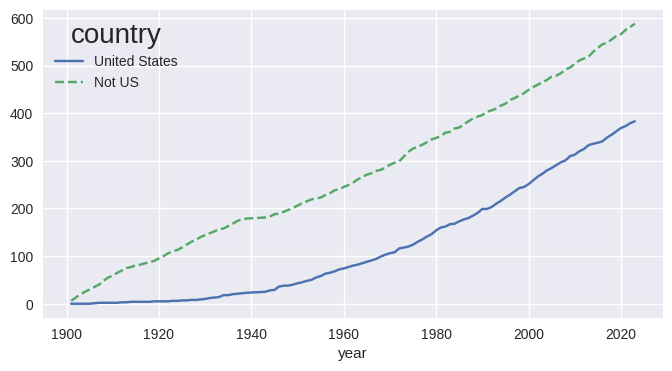

In [93]:
by_year_nat_sz = df.groupby(["year", "country"]).size().unstack().fillna(0)
not_US = by_year_nat_sz.columns.tolist()
not_US.remove("United States")
by_year_nat_sz["Not US"] = by_year_nat_sz[not_US].sum(axis=1)
ax = by_year_nat_sz[["United States", "Not US"]].cumsum().plot(style=["-", "--"])

<Axes: xlabel='year'>

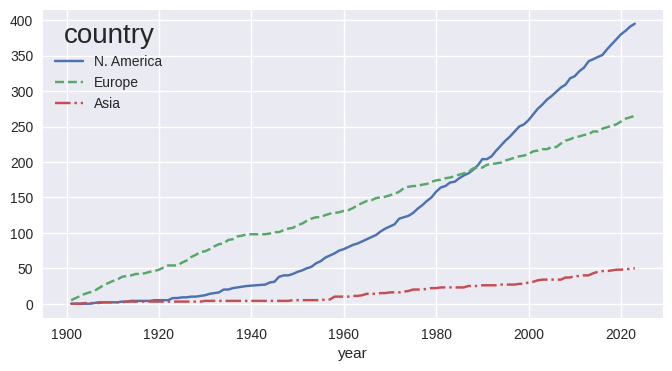

In [94]:
by_year_nat_sz = df.groupby(["year", "country"]).size().unstack().fillna(0)

regions = [
    {"label": "N. America", "countries": ["United States", "Canada"]},
    {"label": "Europe", "countries": ["United Kingdom", "Germany", "France"]},
    {"label": "Asia", "countries": ["Japan", "Russia and Soviet Union", "India"]},
]

for region in regions:
    by_year_nat_sz[region["label"]] = by_year_nat_sz[region["countries"]].sum(axis=1)

by_year_nat_sz[[r["label"] for r in regions]].cumsum().plot(style=["-", "--", "-."])

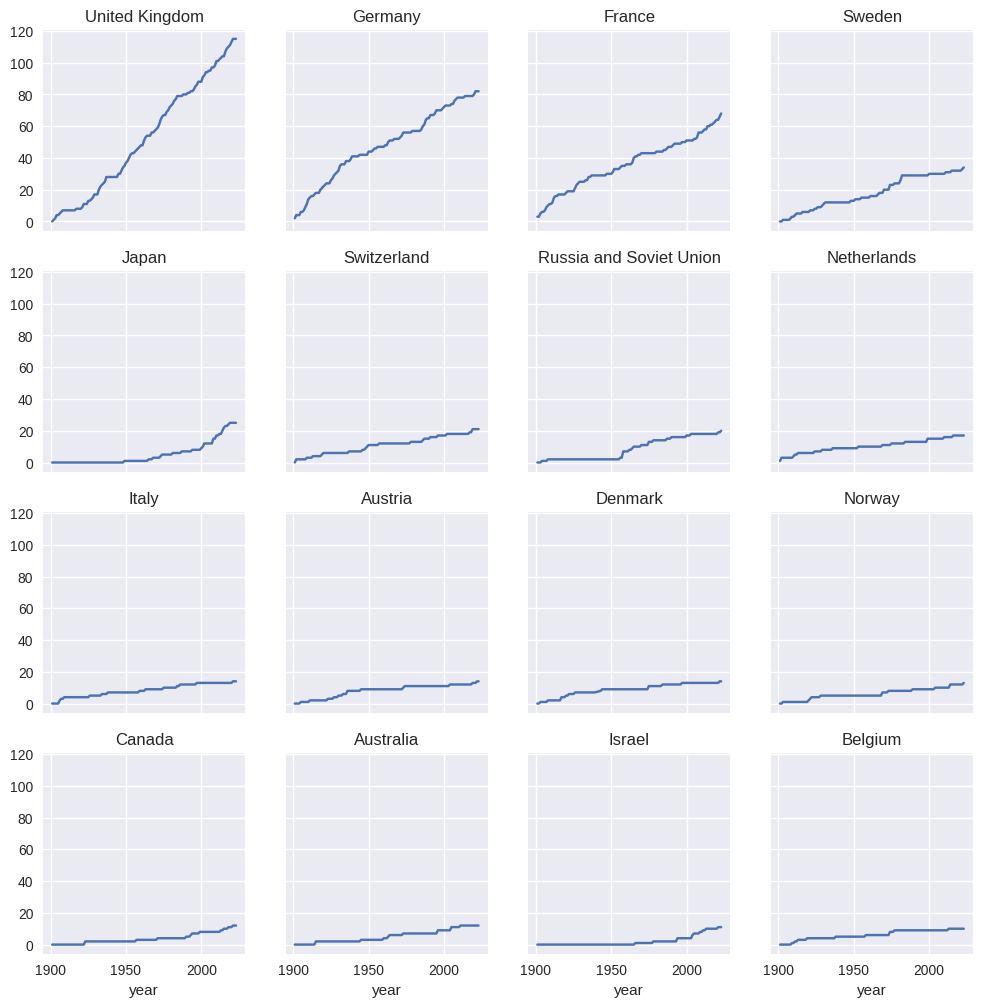

In [95]:
COL_NUM = 4
ROW_NUM = 4
by_nat_sz = df.groupby("country").size()
by_nat_sz.sort_values(ascending=False, inplace=True)

fig, axes = plt.subplots(COL_NUM, ROW_NUM, sharex=True, sharey=True, figsize=(12, 12))

for i, nat in enumerate(by_nat_sz.index[1:17]):
    ax = axes[int(i / COL_NUM), i % ROW_NUM]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

<Axes: xlabel='year', ylabel='country'>

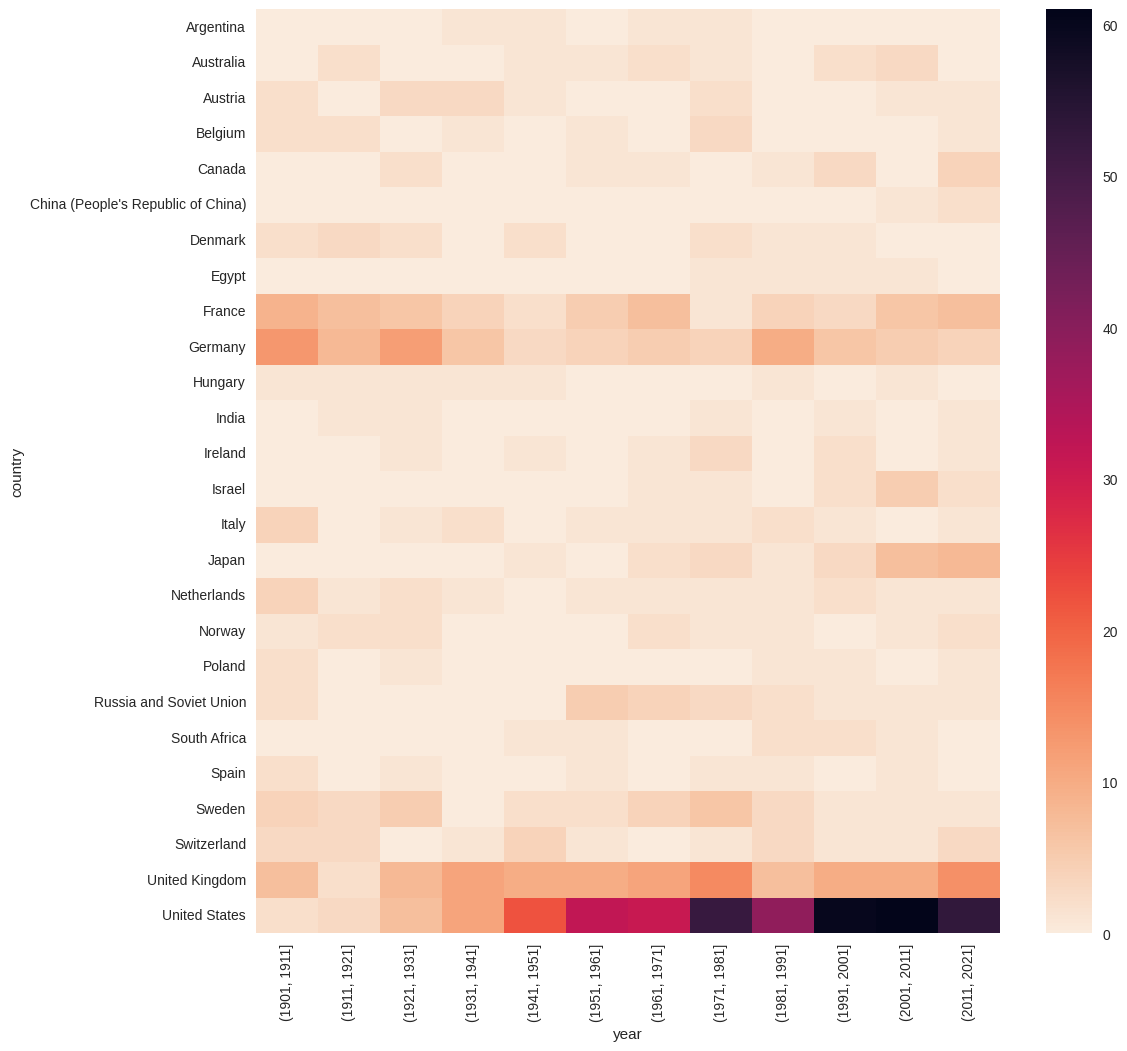

In [96]:
# Gets our bin ranges for the decades from 1901 (1901, 1911, 1921...).
bins = np.arange(df.year.min(), df.year.max(), 10)
# Cuts our Nobel Prize years into decades using the bins ranges
# with precision set to 0 , to give integer years.
by_year_nat_binned = (
    df.groupby(["country", pd.cut(df.year, bins, precision=0)])
    .size()
    .unstack()
    .fillna(0)
)
plt.figure(figsize=(12, 12))
# Before heatmapping, we filter for those countries with over two Nobel Prizes.
sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2], cmap="rocket_r")

<Axes: >

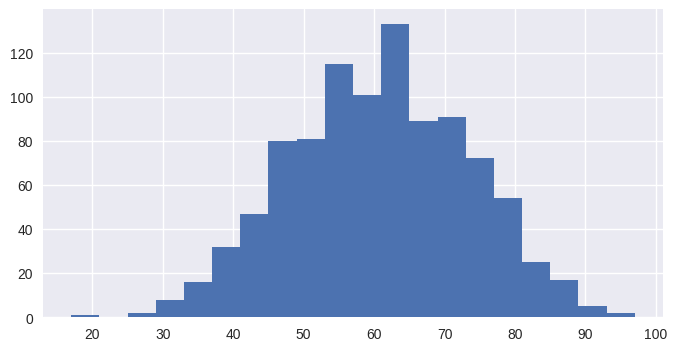

In [97]:
df["award_age"].hist(bins=20)

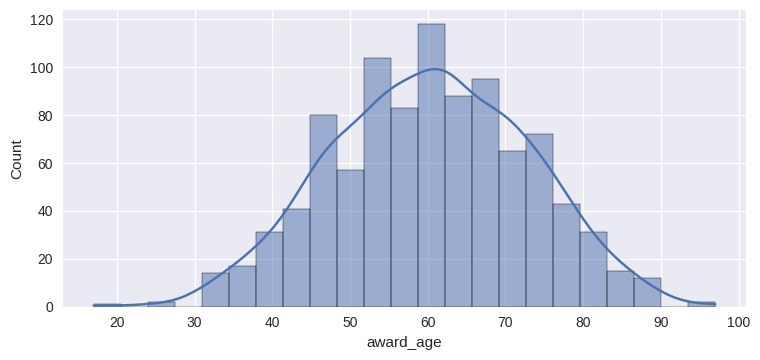

In [98]:
sns.displot(df["award_age"], kde=True, height=4, aspect=2)

In [99]:
df[df["award_age"] > 90]

,link,name,year,category,country,text,date_of_birth,date_of_death,place_of_birth,place_of_death,gender,award_age,born_in,mini_bio,bio_image
368,http://en.wikipedia.org/wiki/Arthur_Ashkin,Arthur Ashkin,2018,Physics,United States,"Arthur Ashkin , Physics, 2018",1922-09-02,2020-09-21,Brooklyn,Rumson,male,96,None,None,None
375,http://en.wikipedia.org/wiki/John_B._Goodenough,John B. Goodenough,2019,Chemistry,United States,"John B. Goodenough , born in Germany , Chemis...",1922-07-25,2023-06-25,Jena,Austin,male,97,Germany,<p><b>John Bannister Goodenough</b> (<span cla...,full/6fcd83d19077616ec1a23a7142608c9ba4ffa709.jpg


<Axes: xlabel='gender', ylabel='award_age'>

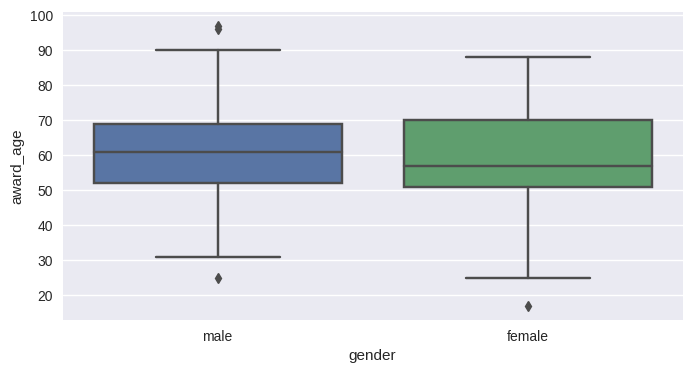

In [100]:
sns.boxplot(x="gender", y="award_age", data=df)

<Axes: xlabel='gender', ylabel='award_age'>

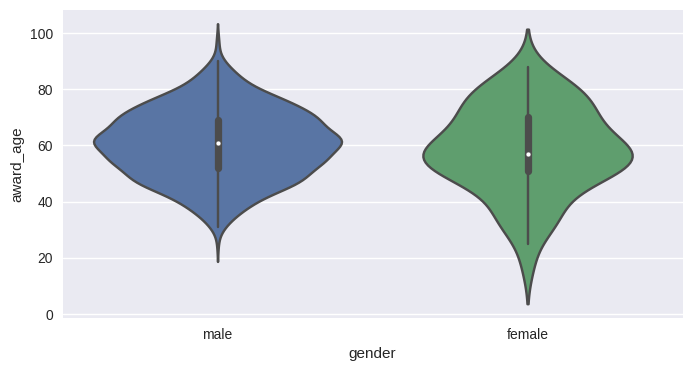

In [101]:
sns.violinplot(x="gender", y="award_age", data=df)

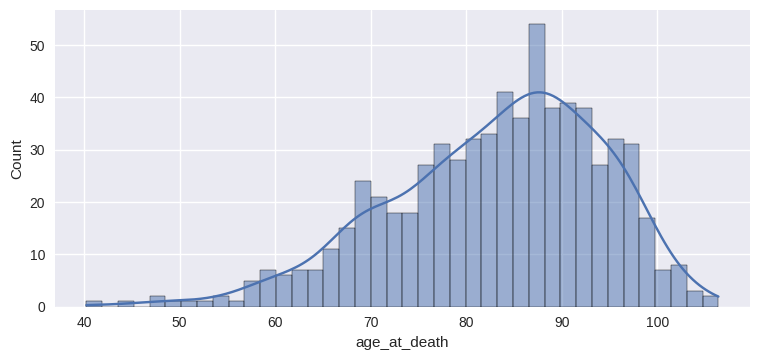

In [102]:
# life expectancy of winners
df["age_at_death"] = (df.date_of_death - df.date_of_birth).dt.days / 356
age_at_death = df[df.age_at_death.notnull()].age_at_death
sns.displot(age_at_death, bins=40, kde=True, aspect=2, height=4)

In [103]:
df[df["age_at_death"] > 100]

,link,name,year,category,country,text,date_of_birth,date_of_death,place_of_birth,place_of_death,gender,award_age,born_in,mini_bio,bio_image,age_at_death
105,http://en.wikipedia.org/wiki/Charles_H._Townes,Charles H. Townes,1964,Physics,United States,"Charles H. Townes , Physics, 1964",1915-07-28,2015-01-27,Greenville,Oakland,male,49,None,None,None,102.087079
108,http://en.wikipedia.org/wiki/Hans_Bethe,Hans Bethe,1967,Physics,United States,"Hans Bethe , born in then Germany, now France...",1906-07-02,2005-03-06,Strasbourg,Ithaca,male,61,Germany,<p><b>Hans Albrecht Bethe</b> (<style data-mw-...,full/390c5cb5ca7608f4971c2dc0752d4423c48b25b7.jpg,101.241573
136,http://en.wikipedia.org/wiki/Henry_Kissinger,Henry Kissinger,1973,Peace,United States,"Henry Kissinger , born in Germany , Peace, 1973",1923-05-27,2023-11-29,Fürth,Kent,male,50,Germany,"<p><b>Henry Alfred Kissinger</b><sup id=""cite_...",full/3039908df84ed0adc4aa4822841329a7084a629e.jpg,103.120787
138,http://en.wikipedia.org/wiki/Renato_Dulbecco,Renato Dulbecco,1975,Physiology or Medicine,United States,"Renato Dulbecco , born in Italy , Physiology ...",1914-02-22,2012-02-19,Catanzaro,La Jolla,male,61,Italy,"<p><b>Renato Dulbecco</b> (<span class=""rt-com...",full/c76f6e5ea5d91dcaee3ed509396996ce6e9159df.jpg,100.536517
145,http://en.wikipedia.org/wiki/Roger_Guillemin,Roger Guillemin,1977,Physiology or Medicine,United States,"Roger Guillemin , born in France , Physiology...",1924-01-11,2024-02-21,Dijon,San Diego,male,53,France,"<p class=""mw-empty-elt"">\n</p><p><b>Roger Char...",full/2dd957d2e11cba10d576606c32124c164d46b2bc.jpg,102.713483
189,http://en.wikipedia.org/wiki/Nicolaas_Bloembergen,Nicolaas Bloembergen,1981,Physics,United States,"Nicolaas Bloembergen , born in the Netherland...",1920-03-11,2017-09-05,Dordrecht,Tucson,male,61,Netherlands,"<p><b>Nicolaas Bloembergen</b> (March 11, 1920...",full/6af2d866db44e5327597205286e1d1143bbb5201.jpg,100.019663
199,http://en.wikipedia.org/wiki/Jack_Steinberger,Jack Steinberger,1988,Physics,United States,"Jack Steinberger , born in Germany , Physics,...",1921-05-25,2020-12-12,Bad Kissingen,Geneva,male,67,Germany,<p><b>Jack Steinberger</b> (born <b>Hans Jakob...,full/f9c4179f3d62f73545d4479d237f18cad655f38f.jpg,102.137640
204,http://en.wikipedia.org/wiki/Robert_M._Solow,Robert M. Solow,1987,Economics,United States,"Robert M. Solow , Economics, 1987",1924-08-23,2023-12-21,Brooklyn,Lexington,male,63,None,None,None,101.907303
219,http://en.wikipedia.org/wiki/Edmond_H._Fischer,Edmond H. Fischer,1992,Physiology or Medicine,United States,"Edmond H. Fischer , born in China , Physiolog...",1920-04-06,2021-08-27,Shanghai French Concession,Seattle,male,72,None,None,None,104.025281
272,http://en.wikipedia.org/wiki/Paul_D._Boyer,Paul D. Boyer,1997,Chemistry,United States,"Paul D. Boyer , Chemistry, 1997",1918-07-31,2018-06-02,Provo,Los Angeles,male,79,None,None,None,102.432584


/tmp/ipykernel_79195/3249022132.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_temp = df_temp[df.age_at_death.notnull()]
/tmp/ipykernel_79195/3249022132.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_temp[df_temp.gender == "male"].age_at_death, shade=True, label="male")
/tmp/ipykernel_79195/3249022132.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


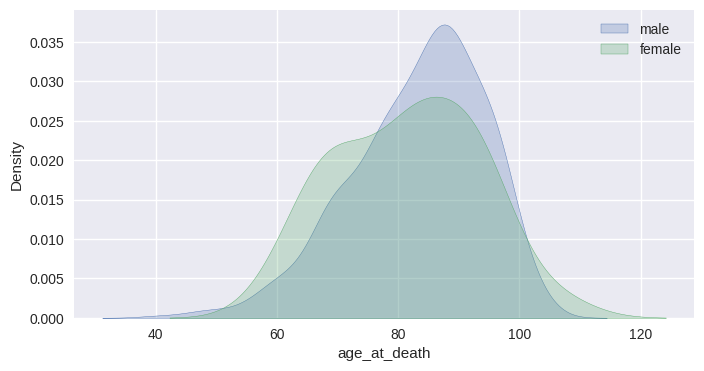

In [104]:
df_temp = df[df.age_at_death.notnull()]
df_temp = df_temp[df.age_at_death.notnull()]
sns.kdeplot(df_temp[df_temp.gender == "male"].age_at_death, shade=True, label="male")
sns.kdeplot(
    df_temp[df_temp.gender == "female"].age_at_death, shade=True, label="female"
)
plt.legend()

<Axes: xlabel='gender', ylabel='age_at_death'>

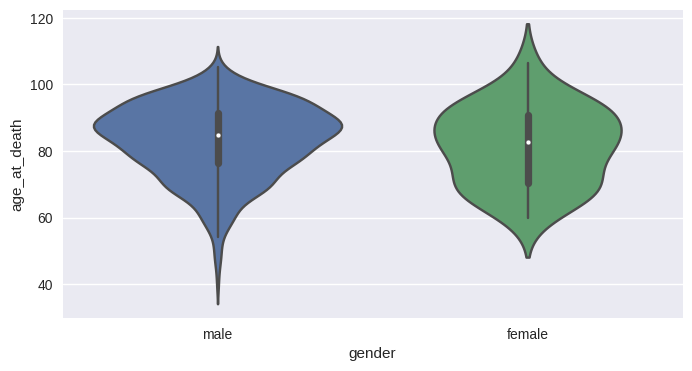

In [105]:
sns.violinplot(data=df, x="gender", y="age_at_death", aspect=2, height=4)

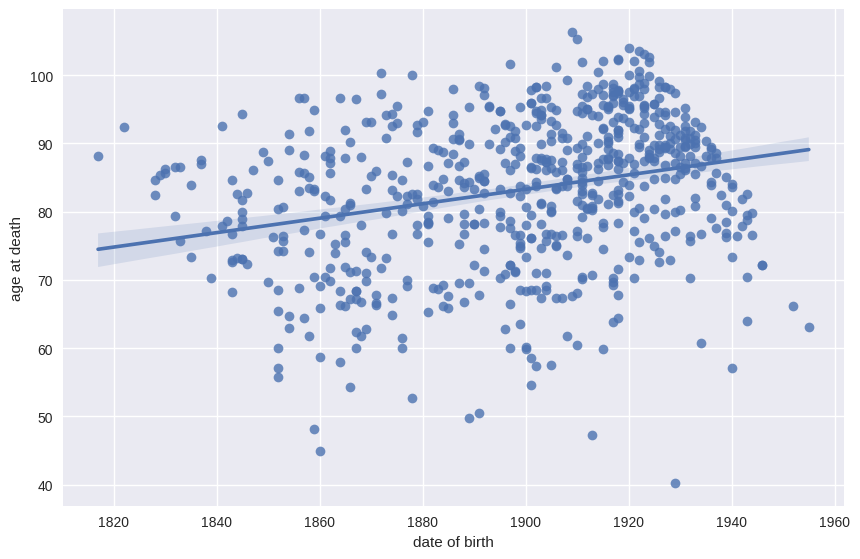

In [106]:
# increasing life expectancies over time
df_temp = df[df.age_at_death.notnull()]
data = pd.DataFrame(
    {
        "age at death": df_temp.age_at_death,
        "date of birth": df_temp.date_of_birth.dt.year,
    }
)
sns.lmplot(data=data, x="date of birth", y="age at death", height=6, aspect=1.5)

<Axes: xlabel='year_of_death'>

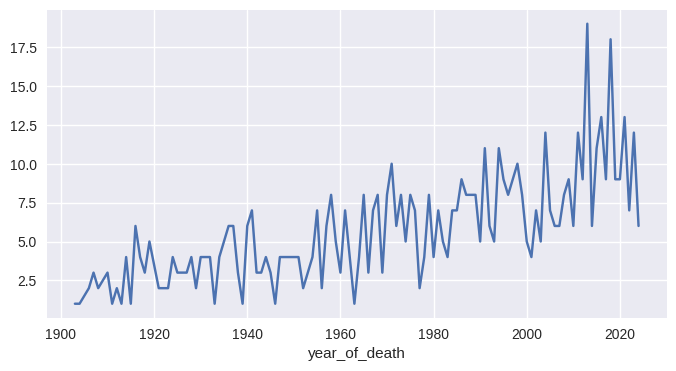

In [180]:
# what year did the most die see the impact of cov
df_temp = df[df.age_at_death.notnull()]

year_index = pd.Index(np.arange(1901, 2023), name="year")

year_of_death = pd.DataFrame()
year_of_death['year_of_death'] = pd.DataFrame([i.year for i in df_temp['date_of_death']])
year_of_death['year_of_death'] = year_of_death
year_of_death.groupby(['year_of_death']).size().plot()

<Axes: xlabel='year_of_birth'>

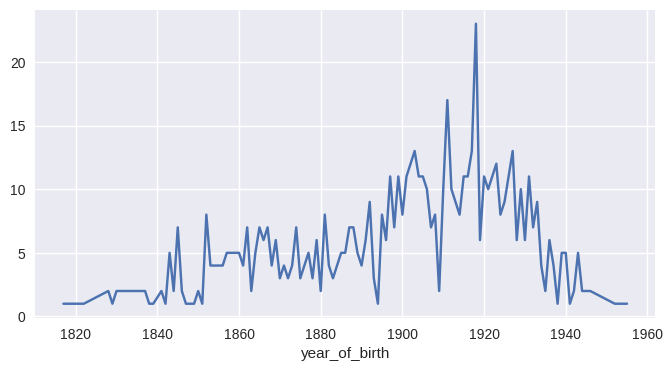

In [183]:
df_temp = df[df.age_at_death.notnull()]

year_index = pd.Index(np.arange(1901, 2023), name="year")

year_of_birth = pd.DataFrame()
year_of_birth['year_of_birth'] = pd.DataFrame([i.year for i in df_temp['date_of_birth']])
year_of_birth['year_of_birth'] = year_of_birth
year_of_birth.groupby(['year_of_birth']).size().plot()

<Axes: xlabel='year_of_birth'>

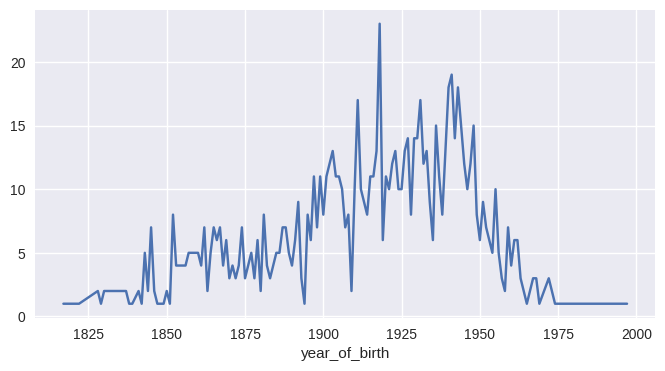

In [182]:
# df_temp = df[df.age_at_death.notnull()]

year_index = pd.Index(np.arange(1901, 2023), name="year")

year_of_birth = pd.DataFrame()
year_of_birth['year_of_birth'] = pd.DataFrame([i.year for i in df['date_of_birth']])
year_of_birth['year_of_birth'] = year_of_birth
year_of_birth.groupby(['year_of_birth']).size().plot()

In [151]:
new_index = pd.Index(np.arange(1901, 2023), name="year")
by_year_nat_sz = df.groupby(["year", "country"]).size().unstack().reindex(new_index)
by_year_nat_sz["United States"].cumsum()

year
1901      NaN
1902      NaN
1903      NaN
1904      NaN
1905      NaN
        ...  
2018    355.0
2019    362.0
2020    369.0
2021    373.0
2022    379.0
Name: United States, Length: 122, dtype: float64

Text(0.5, 1.0, 'The Nobel Diaspora')

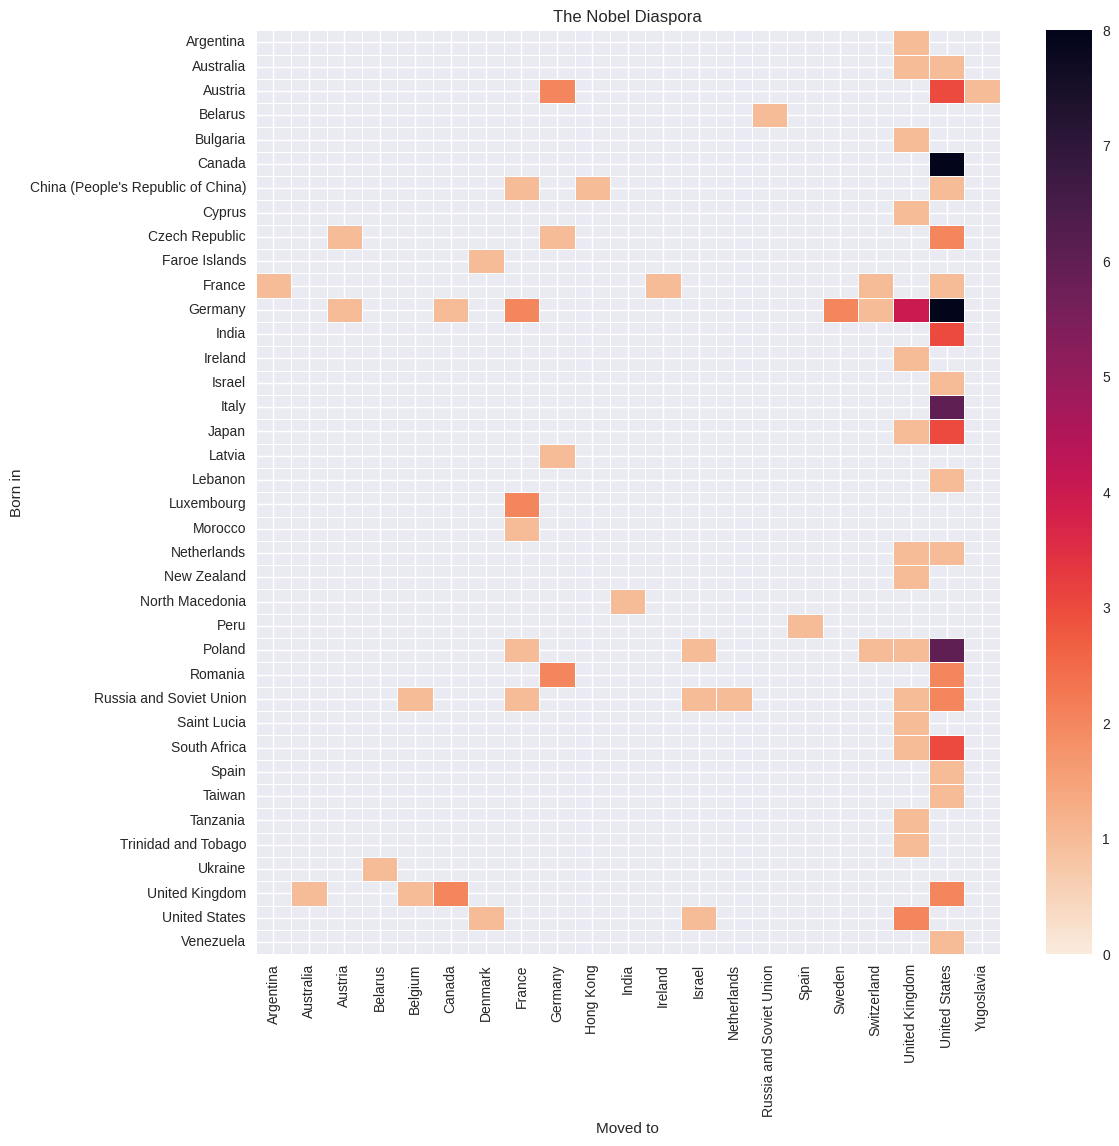

In [161]:
# Selects all rows with a 'born_in' field, and forms groups on
# this and the country column.
by_bornin_nat = (
    df[df.born_in.notnull()].groupby(["born_in", "country"]).size().unstack()
)
# We rename the row index and column names to make them
# more descriptive.
by_bornin_nat.index.name = "Born in"
by_bornin_nat.columns.name = "Moved to"
plt.figure(figsize=(12, 12))
# Seaborn’s heatmap attempts to set the correct bounds for the
# data, but in this case, we must manually adjust the limits ( vmin
# and vmax ) to see all the cells.
ax = sns.heatmap(by_bornin_nat, vmin=0, vmax=8, cmap="rocket_r", linewidth=0.5)
ax.set_title("The Nobel Diaspora")

In [164]:
df[(df.born_in == 'Germany') & (df.country == 'United Kingdom')][['name', 'date_of_birth', 'category','year']]

,name,date_of_birth,category,year
435,Ernst Boris Chain,1906-06-19,Physiology or Medicine,1945
446,Max Born,1882-12-11,Physics,1954
451,Hans Adolf Krebs,1900-08-25,Physiology or Medicine,1953
454,Bernard Katz,1911-03-26,Physiology or Medicine,1970
